Modelo 1

In [1]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('diamonds.csv')

In [3]:
dataset 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
dataset.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


mapear: cut, color, clarity

In [7]:
dataset.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
dataset.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
dataset.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Procedemos a mapear las columnas categóricas

In [10]:
#dataset['cut'] = dataset.cut.map({'Ideal':1,'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5})

In [11]:
#dataset['color'] = dataset.color.map({'E':1,'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})

In [12]:
#dataset['clarity'] = dataset.clarity.map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})

In [13]:
encoder = preprocessing.LabelEncoder()

In [14]:
dataset['cut']= encoder.fit_transform(dataset['cut'])

In [15]:
dataset['color']= encoder.fit_transform(dataset['color'])

In [16]:
dataset['clarity']= encoder.fit_transform(dataset['clarity'])

In [17]:
dataset.info

<bound method DataFrame.info of        carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [18]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


Para normalizar los datos proceda a hacer uso del preprocesador "MinMaxScaler"

In [19]:
#importe la libreria
from sklearn.preprocessing import MinMaxScaler

In [20]:
#cree el modelo
escalar = MinMaxScaler()
#cree un modelo por cada columna
#escalar = MinMaxScaler()
#escalar_depth = MinMaxScaler()
#escalar_table = MinMaxScaler()
#escalar_price= MinMaxScaler()
#escalar_x = MinMaxScaler()
#escalar_y = MinMaxScaler()
#escalar_z = MinMaxScaler()

In [21]:
#transformación de los datos
dataset[['depth']] = escalar.fit_transform(dataset[['depth']])

In [22]:
dataset[['table']] = escalar.fit_transform(dataset[['table']])

In [23]:
dataset[['price']] = escalar.fit_transform(dataset[['price']])

In [24]:
dataset[['x']] = escalar.fit_transform(dataset[['x']])

In [25]:
dataset[['y']] = escalar.fit_transform(dataset[['y']])

In [26]:
dataset[['z']] = escalar.fit_transform(dataset[['z']])

In [27]:
dataset.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,0.520817,0.278023,0.194994,0.533627,0.097360,0.111281
std,0.474011,1.027708,1.701105,1.724591,0.039795,0.042971,0.215680,0.104447,0.019391,0.022192
min,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,0.500000,0.250000,0.033735,0.438547,0.080136,0.091509
50%,0.700000,2.000000,3.000000,4.000000,0.522222,0.269231,0.112180,0.530726,0.096944,0.111006
75%,1.040000,3.000000,4.000000,5.000000,0.541667,0.307692,0.270219,0.608939,0.111036,0.127044
max,5.010000,4.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
corr = round(dataset.corr(), 4)
corr.style.background_gradient()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017100,0.291400,-0.214300,0.028200,0.181600,0.921600,0.975100,0.951700,0.953400
cut,0.017100,1.000000,0.000300,0.028200,-0.194200,0.150300,0.039900,0.022300,0.027600,0.002000
color,0.291400,0.000300,1.000000,-0.027800,0.047300,0.026500,0.172500,0.270300,0.263600,0.268200
clarity,-0.214300,0.028200,-0.027800,1.000000,-0.053100,-0.088200,-0.071500,-0.225700,-0.217600,-0.224300
depth,0.028200,-0.194200,0.047300,-0.053100,1.000000,-0.295800,-0.010600,-0.025300,-0.029300,0.094900
table,0.181600,0.150300,0.026500,-0.088200,-0.295800,1.000000,0.127100,0.195300,0.183800,0.150900
price,0.921600,0.039900,0.172500,-0.071500,-0.010600,0.127100,1.000000,0.884400,0.865400,0.861200
x,0.975100,0.022300,0.270300,-0.225700,-0.025300,0.195300,0.884400,1.000000,0.974700,0.970800
y,0.951700,0.027600,0.263600,-0.217600,-0.029300,0.183800,0.865400,0.974700,1.000000,0.952000
z,0.953400,0.002000,0.268200,-0.224300,0.094900,0.150900,0.861200,0.970800,0.952000,1.000000


<Axes: >

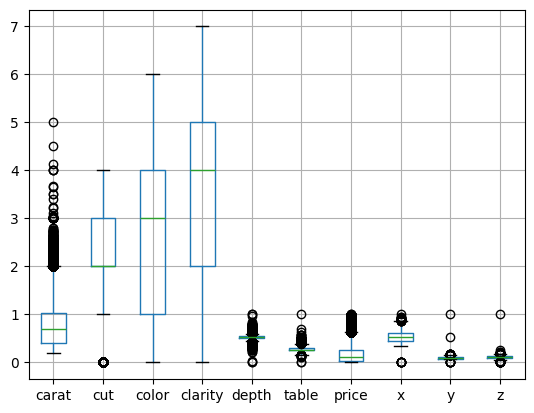

In [29]:
dataset.boxplot()

Proceda a separar la data

In [30]:
dataset.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [31]:
#axis= 0 ->para filas
#axis = 1 | axis  = 'columns' -> para las columnas
# inplace = True -> eliminar de manera definitiva
data_x = dataset.drop(['cut'], axis='columns')
data_y = dataset.cut

In [32]:
data_x

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.21,1,2,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.23,1,4,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.29,5,5,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.31,6,3,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,2,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.72,0,2,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.70,0,2,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.86,4,3,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


In [33]:
data_y

0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53940, dtype: int32

Procedemos a crear el modelo y entrenarlo

In [34]:
#Cree el modelo
model_neighbors =  KNeighborsClassifier(n_neighbors=5)

In [35]:
#Cree los parámetros de entrenamiento
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.1)

In [36]:
#comprueba el conjunto de entrenamiento (train) y la muestra/prueba (test)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((48546, 9), (5394, 9), (48546,), (5394,))

In [37]:
#observo que contiene train_x
train_x

,carat,color,clarity,depth,table,price,x,y,z
8710,0.31,3,4,0.536111,0.211538,0.014056,0.401304,0.073514,0.084591
28177,0.30,0,4,0.475000,0.288462,0.018381,0.405028,0.074194,0.082390
2641,1.03,4,0,0.513889,0.269231,0.156998,0.607076,0.110017,0.125786
14424,1.01,1,2,0.583333,0.326923,0.297183,0.594041,0.106621,0.127358
51653,0.26,3,7,0.536111,0.250000,0.011840,0.378957,0.069610,0.079874
...,...,...,...,...,...,...,...,...,...
52322,0.80,2,3,0.527778,0.269231,0.117262,0.554935,0.101528,0.116352
22967,1.59,5,4,0.505556,0.284615,0.578040,0.698324,0.127674,0.144654
18417,1.24,0,2,0.538889,0.307692,0.387090,0.638734,0.115789,0.134277
16454,1.21,4,2,0.466667,0.288462,0.337730,0.647114,0.117148,0.130189


In [38]:
#observo que contiene train_y
train_y

8710     2
28177    4
2641     2
14424    1
51653    2
        ..
52322    2
22967    4
18417    3
16454    3
26698    3
Name: cut, Length: 48546, dtype: int32

In [39]:
#Entrene el modelo
model_neighbors.fit(train_x, train_y)

KNeighborsClassifier()

In [40]:
#clasificación de los datos
y_predicted = model_neighbors.predict(test_x)

In [41]:
#observe que contiene y_predicted
y_predicted

array([3, 3, 4, ..., 3, 1, 3])

In [42]:
# Medir la confianza de nuestro modelo
print(f'Score de predicción: {round(model_neighbors.score(test_x, test_y), 4) * 100}%')


Score de predicción: 63.0%


In [43]:
print(f'Score de entrenamiento: {round(model_neighbors.score(train_x, train_y), 4) * 100}%')

Score de entrenamiento: 73.85000000000001%


In [44]:
model_neighbors.score(test_x, test_y)

0.6299592139414164

Humanizar la salida

In [45]:
train_x

,carat,color,clarity,depth,table,price,x,y,z
8710,0.31,3,4,0.536111,0.211538,0.014056,0.401304,0.073514,0.084591
28177,0.30,0,4,0.475000,0.288462,0.018381,0.405028,0.074194,0.082390
2641,1.03,4,0,0.513889,0.269231,0.156998,0.607076,0.110017,0.125786
14424,1.01,1,2,0.583333,0.326923,0.297183,0.594041,0.106621,0.127358
51653,0.26,3,7,0.536111,0.250000,0.011840,0.378957,0.069610,0.079874
...,...,...,...,...,...,...,...,...,...
52322,0.80,2,3,0.527778,0.269231,0.117262,0.554935,0.101528,0.116352
22967,1.59,5,4,0.505556,0.284615,0.578040,0.698324,0.127674,0.144654
18417,1.24,0,2,0.538889,0.307692,0.387090,0.638734,0.115789,0.134277
16454,1.21,4,2,0.466667,0.288462,0.337730,0.647114,0.117148,0.130189


In [46]:
def predict_cut(model, carat, color, clarity, depth, table, price, x, y, z):
    result = model_neighbors.predict([carat, color, clarity, depth, table, price, x, y, z])
    print(f'El diamante con los valores de: *\nPeso en quilates:{carat} *\nColor:{color} *\nClaridad:{clarity} *\nProfundidad:{depth} *\nTamaño de la mesa del diamante:{table} *\nPrecio de:{price} $ *\nLargo:{x} *\nAncho:{y} *\nAlto:{z} *\nTiene un corte de:{result[0]}')

In [52]:
dataset.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [53]:
dataset.color.unique()

array([1, 5, 6, 4, 2, 3, 0])

In [54]:
dataset.clarity.unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [55]:
dataset.cut.unique()

array([2, 3, 1, 4, 0])

In [56]:
encoder.classes_

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)

In [57]:
#predict_cut(carat, color, clarity, depth, table, price, x, y, z)
dataset.color = encoder.transform(dataset.color)

ValueError: y contains previously unseen labels: 1

In [49]:
#importe la libreria para analizar el margen de error
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#calcula el MSE, error cuadrático medio
calcular_mse = mean_squared_error(test_y, y_predicted)
#calcula el coeficiente r^2
coeficiente = r2_score(test_y, y_predicted)

In [51]:
#Resultado de los cálculos
print(f'MSE: {calcular_mse}')
print(f'R^2: {coeficiente}')

MSE: 1.164627363737486
R^2: -0.10327891756131513


In [ ]:
def classify_price(model, carat, color,	clarity, depth,	table, price, x,	y,	z):
  result = model.predict([[carat, color,	clarity, depth,	table, price, x,	y,	z]])
  print(f'El diamante con los siguientes datos: \n *Peso del diamante en kilate: {carat}kt \n *Color del diamante: {list_color[color]} \n *Claridad del diamante: {list_clarity[clarity]} \n *Profundidad del diamante: {depth} \n *Tamaño de la mesa del diamante: {table} \n *Precio del diamante: {price}  \n *Largo del diamante: {x} \n *Ancho del diamante: {y} \n *Alto del diamante: {z} \n *Tiene un corte de: {result[0]} ')

In [ ]:
list_color = ['None', 'E', 'I', 'J', 'H', 'F', 'G', 'D']
list_clarity = ['None', 'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [ ]:
carat = 0.78
table = 15.0
color = 5
clarity = 1
depth = 62.4
price = 335
x = 5.79
y = 1.20
z = 6.49

In [ ]:
classify_price(model_tree, carat, color, clarity, depth, table, price, x, y, z)